# Thoracic Surgery


## Preprocessing

Download dataset

In [81]:
!mkdir dataset
!wget https://raw.githubusercontent.com/GiuseppeMoscarelli/Thoracic-Surgery/main/dataset/ThoraricSurgery.csv -P dataset -nc

mkdir: cannot create directory ‘dataset’: File exists
File ‘dataset/ThoraricSurgery.csv’ already there; not retrieving.



In [82]:
from pathlib import Path
import matplotlib.pyplot as plt


In [83]:

DATASET_PATH = Path('.') / 'dataset' / 'ThoraricSurgery.csv'


def load_dataset():
    df = pd.read_csv(DATASET_PATH)
    df = df.drop('id', 1)
    return df


In [84]:
pd.set_option('display.max_colwidth', 5000)
df = load_dataset()

# Rename the columns to more understanble names
col_names = {'DGN': 'Diagnosis', 'PRE4': 'FVC', 'PRE5': 'FEV1', 'PRE6': 'Performance',
              'PRE7': 'Pain', 'PRE8': 'Haemoptysis', 'PRE9': 'Dyspnoea', 'PRE10': 'Cough',
              'PRE11': 'Weakness', 'PRE14': 'Tumor_Size', 'PRE17': 'Diabetes_Mellitus',
              'PRE19': 'MI_6mo', 'PRE25': 'PAD', 'PRE30': 'Smoking', 'PRE32': 'Asthma',
              'AGE': 'Age', 'Risk1Yr': 'Death_1yr'}

df = df.rename(index=str, columns=col_names)

print(df.head())

# Check that there are no null values
null_values = df.isnull().sum()

print("The number of missing values for each column is: ")
print(null_values)
print()

if null_values[1].sum() == 0:
    print("There are no missing values")
else:
    print("There are missing values")

  Diagnosis   FVC  FEV1 Performance Pain Haemoptysis Dyspnoea Cough Weakness  \
0      DGN2  2.88  2.16        PRZ1    F           F        F     T        T   
1      DGN3  3.40  1.88        PRZ0    F           F        F     F        F   
2      DGN3  2.76  2.08        PRZ1    F           F        F     T        F   
3      DGN3  3.68  3.04        PRZ0    F           F        F     F        F   
4      DGN3  2.44  0.96        PRZ2    F           T        F     T        T   

  Tumor_Size Diabetes_Mellitus MI_6mo PAD Smoking Asthma  Age Death_1yr  
0       OC14                 F      F   F       T      F   60         F  
1       OC12                 F      F   F       T      F   51         F  
2       OC11                 F      F   F       T      F   59         F  
3       OC11                 F      F   F       F      F   54         F  
4       OC11                 F      F   F       T      F   73         T  
The number of missing values for each column is: 
Diagnosis            0
FV

In [85]:
def map_boolean_to_real(df, columns):
    x = (df[columns] == 'T').astype(int)
    df[columns] = x
    return df


In [86]:
df = map_boolean_to_real(df, [
                              'Pain', 'Haemoptysis', 'Dyspnoea', 'Cough',
                              'Weakness', 'Diabetes_Mellitus', 'MI_6mo', 'PAD',
                              'Smoking', 'Asthma', 'Death_1yr'
                              ])
df.head(5)

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,DGN2,2.88,2.16,PRZ1,0,0,0,1,1,OC14,0,0,0,1,0,60,0
1,DGN3,3.40,1.88,PRZ0,0,0,0,0,0,OC12,0,0,0,1,0,51,0
2,DGN3,2.76,2.08,PRZ1,0,0,0,1,0,OC11,0,0,0,1,0,59,0
3,DGN3,3.68,3.04,PRZ0,0,0,0,0,0,OC11,0,0,0,0,0,54,0
4,DGN3,2.44,0.96,PRZ2,0,1,0,1,1,OC11,0,0,0,1,0,73,1


Scatter plot the three continuous attributes "FVC", "FEV1" and "Age"

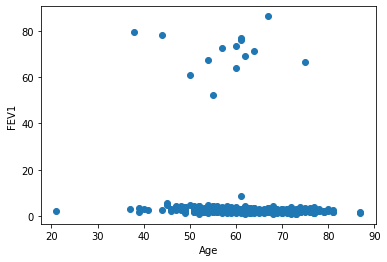

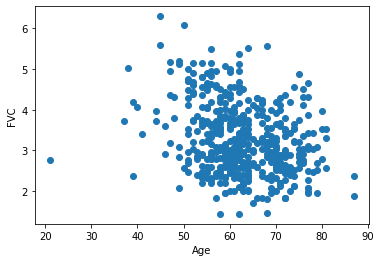

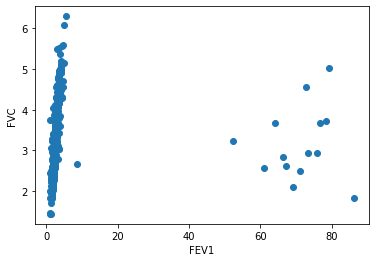

In [87]:
plt.plot(df.Age, df.FEV1, linestyle='none', marker='o')
plt.xlabel('Age')
plt.ylabel('FEV1')
plt.show()

plt.plot(df.Age, df.FVC, linestyle='none', marker='o')
plt.xlabel('Age')
plt.ylabel('FVC')
plt.show()

plt.plot(df.FEV1, df.FVC, linestyle='none', marker='o')
plt.xlabel('FEV1')
plt.ylabel('FVC')
plt.show()

In [88]:
# from sklearn.svm import OneClassSVM

# svm_clf = OneClassSVM(kernel='sigmoid', gamma='auto').fit(df.FVC.values.reshape(-1, 1))
# y_pred =svm_clf.predict(df.FVC.values.reshape(-1, 1))

# print(y_pred)

In [89]:
print("Removing {} outliers".format((df['FEV1'] >= 7).sum()))

df = df[df['FEV1'] < 7] # TODO: use outlier detection to remove the hardcoded value

Removing 15 outliers


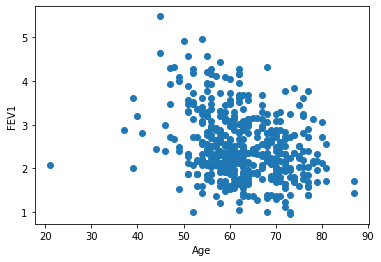

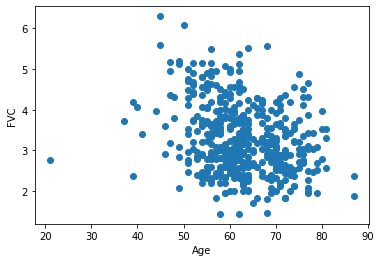

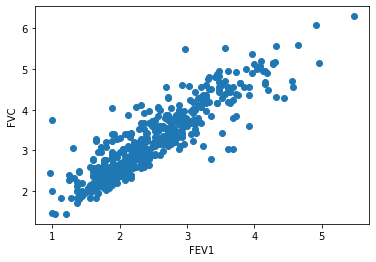

In [90]:
plt.plot(df.Age, df.FEV1, linestyle='none', marker='o')
plt.xlabel('Age')
plt.ylabel('FEV1')
plt.show()

plt.plot(df.Age, df.FVC, linestyle='none', marker='o')
plt.xlabel('Age')
plt.ylabel('FVC')
plt.show()

plt.plot(df.FEV1, df.FVC, linestyle='none', marker='o')
plt.xlabel('FEV1')
plt.ylabel('FVC')
plt.show()

In [92]:
SAVE_PATH = Path('.') / 'dataset' / 'CleanThoracicSurgery.csv'

df.to_csv(SAVE_PATH)